# Evaluation of Machine Learning Classifiers for Bioactivity Prediction  

In this Jupyter Notebook, we will evaluate the performance of various machine learning classifiers on a bioactivity prediction dataset. The analysis will involve:  

## 1. Data Preparation  
- **Importing the dataset:** Load the bioactivity dataset for analysis.  
- **Calculating molecular fingerprints:** Generate AtomPairs2D molecular fingerprints necessary for feature extraction.  
- **Splitting the data:** Divide the dataset into training and testing sets for model evaluation. 

## 2. Model Training and Evaluation  
We will implement different classifiers, including:  
- **Random Forest**  
- **AdaBoost**  
- **Bagging**  
- **Extra Trees**  
- **Gradient Boosting**  
- **XGBoost**  
- **Support Vector Machine (SVM)**   

We will assess their performance using metrics such as:  
- **Accuracy**  
- **Precision**  
- **Recall**  
- **F1 Score**  
- **Matthews Correlation Coefficient (MCC)**  
- **ROC AUC**  

## 3. Visualization  
- **ROC Curves:** Generate Receiver Operating Characteristic (ROC) curves to visualize the classifiers' performances.  
- **Accuracy Comparison Plots:** Create plots to compare the accuracy of the different models visually.  

The goal of this analysis is to identify the most effective model for predicting the bioactivity of natural compounds which could provide valuable insights for drug discovery applications.

In [1]:
# Import essential libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Import modules for model evaluation and data splitting
from sklearn.model_selection import cross_val_score, KFold, train_test_split

# Import performance metrics for classification models
from sklearn import metrics
from sklearn.metrics import (
    accuracy_score, 
    log_loss,
    precision_score, 
    recall_score, 
    f1_score, 
    matthews_corrcoef,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score, 
    roc_curve, 
    auc,
)  

# Import classifiers for machine learning models
from sklearn.ensemble import (  
    RandomForestClassifier,  
    AdaBoostClassifier,  
    BaggingClassifier,  
    ExtraTreesClassifier,  
    GradientBoostingClassifier,  
)  
from sklearn.svm import SVC  # Support Vector Classifier
from xgboost import XGBClassifier  # Extreme Gradient Boosting Classifier

# Importing the time module to measure execution time of model training and evaluation
import time

## Generate a dataset of SMILES strings for calculating extended molecular fingerprints

In [2]:
smiles_df = pd.read_csv("standard_data_for_future_work.csv")
smiles_df.head()

,Unnamed: 0,Molecule ChEMBL ID,Smiles,Standard Type,Standard Relation,Standard Units,Standard Value,Activity
0,2,CHEMBL416126,CS(=O)(=O)c1ccc(-c2cc(F)c(F)cc2-c2ccc3c(c2)OCO...,IC50,'=',nM,12.00,1
1,4,CHEMBL143776,Fc1ccc(-c2[nH]c(-c3ccc(F)cc3)c3c2C2CCC3C2)cc1,IC50,'=',nM,0.08,1
2,5,CHEMBL322276,CC1(C)OC(=O)C(Oc2ccc3[nH]ccc3c2)=C1c1ccc(S(C)(...,IC50,'=',nM,240.00,1
3,7,CHEMBL43864,Cc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1C1CCCCC1,IC50,'=',nM,520.00,1
4,13,CHEMBL45090,CS(=O)(=O)c1ccc(-n2cc(C(F)(F)F)nc2-c2cc(Cl)cc(...,IC50,'=',nM,169.82,1


In [3]:
smiles_df= smiles_df[['Smiles', 'Molecule ChEMBL ID']]

In [4]:
smiles_df.head()

,Smiles,Molecule ChEMBL ID
0,CS(=O)(=O)c1ccc(-c2cc(F)c(F)cc2-c2ccc3c(c2)OCO...,CHEMBL416126
1,Fc1ccc(-c2[nH]c(-c3ccc(F)cc3)c3c2C2CCC3C2)cc1,CHEMBL143776
2,CC1(C)OC(=O)C(Oc2ccc3[nH]ccc3c2)=C1c1ccc(S(C)(...,CHEMBL322276
3,Cc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1C1CCCCC1,CHEMBL43864
4,CS(=O)(=O)c1ccc(-n2cc(C(F)(F)F)nc2-c2cc(Cl)cc(...,CHEMBL45090


In [5]:
smiles_df.to_csv('smiles_for_paddle.csv')
print("Created successfully!")

Created successfully!


## Create a classification dataset containing only the "Molecule ChEMBL ID" and "Activity" columns for the next steps

In [6]:
data_for_classification = pd.read_csv('standard_data_for_future_work.csv')

In [7]:
data_for_classification= data_for_classification[['Molecule ChEMBL ID', 'Activity']]

In [8]:
data_for_classification.tail()

,Molecule ChEMBL ID,Activity
2978,CHEMBL5094564,0
2979,CHEMBL5087242,0
2980,CHEMBL5089355,1
2981,CHEMBL4758581,1
2982,CHEMBL5286930,1


In [9]:
data_for_classification.shape

(2983, 2)

In [10]:
data_for_classification.to_csv('data_for_classification.csv')
print("Created successfully!")

Created successfully!


## Dataset after Calculating Molecular Fingerprints


In [11]:
fingerprint_df= pd.read_csv('Atompairs2dfingerprint.csv')

In [12]:
fingerprint_df.shape

(2983, 781)

In [13]:
fingerprint_df.head()

,Name,AD2D1,AD2D2,AD2D3,AD2D4,AD2D5,AD2D6,AD2D7,AD2D8,AD2D9,...,AD2D771,AD2D772,AD2D773,AD2D774,AD2D775,AD2D776,AD2D777,AD2D778,AD2D779,AD2D780
0,CHEMBL416126,1,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL143776,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL322276,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL43864,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL45090,1,1,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Add the "Activity" column to the dataset containing molecular fingerprints

In [14]:
classification_prep_data = fingerprint_df.copy()

In [15]:
activity = []
for i in data_for_classification['Activity']:
    activity.append(i)

In [16]:
classification_prep_data['Activity'] = activity

In [17]:
classification_prep_data.head()

,Name,AD2D1,AD2D2,AD2D3,AD2D4,AD2D5,AD2D6,AD2D7,AD2D8,AD2D9,...,AD2D772,AD2D773,AD2D774,AD2D775,AD2D776,AD2D777,AD2D778,AD2D779,AD2D780,Activity
0,CHEMBL416126,1,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,CHEMBL143776,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,CHEMBL322276,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,CHEMBL43864,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,CHEMBL45090,1,1,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [18]:
classification_prep_data.shape

(2983, 782)

## Save the dataset to a file for future use


In [19]:
classification_prep_data.to_csv('classification_prep_data.csv')
print("Created successfully!")

Created successfully!


## Drop the "Name" column to prepare the dataset for calculations

In [20]:
classification_prep_data = classification_prep_data.drop(['Name'], axis = 1)

In [21]:
classification_prep_data.head()

,AD2D1,AD2D2,AD2D3,AD2D4,AD2D5,AD2D6,AD2D7,AD2D8,AD2D9,AD2D10,...,AD2D772,AD2D773,AD2D774,AD2D775,AD2D776,AD2D777,AD2D778,AD2D779,AD2D780,Activity
0,1,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,1,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [22]:
classification_prep_data.shape

(2983, 781)

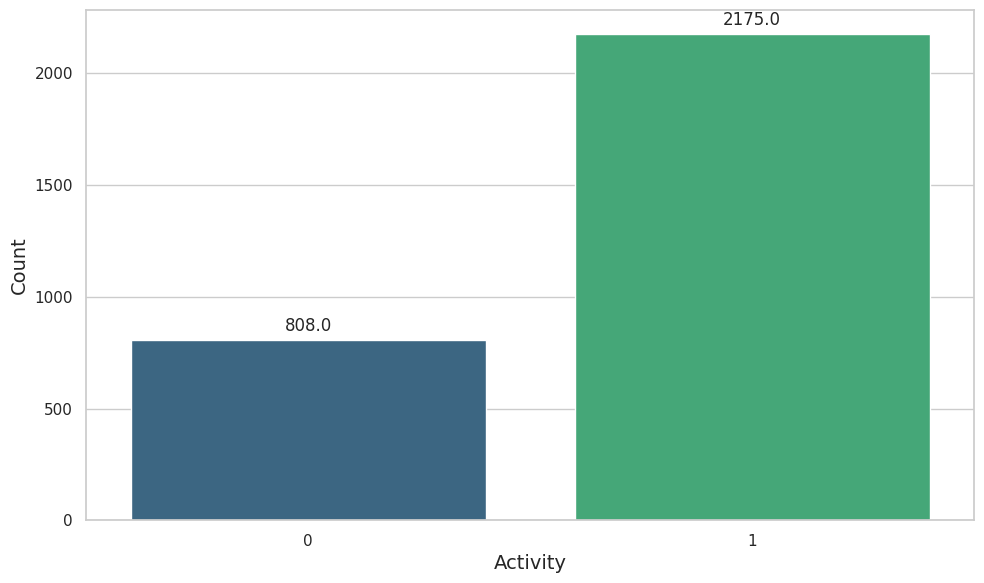

In [23]:
# Create the bar plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plot = sns.countplot(x='Activity', data=classification_prep_data, palette='viridis')


plot.set_xlabel('Activity', fontsize=14)
plot.set_ylabel('Count', fontsize=14)
# plot.set_title('Distribution of Activity Classes', fontsize=16)

for p in plot.patches:
    plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

plt.tight_layout()
plt.savefig('activity_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

## Split the data into training and testing sets for model evaluation

In [24]:
X = classification_prep_data.copy()
y = X.pop('Activity')

In [25]:
X.shape

(2983, 780)

In [26]:
y.shape

(2983,)

In [27]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.20, random_state=42)

In [28]:
train_x.shape

(2386, 780)

In [29]:
train_y.shape

(2386,)

In [30]:
test_x.shape

(597, 780)

In [31]:
test_y.shape

(597,)

## Define a function to calculate the mean accuracy score using cross-validation


In [32]:
def my_score(X, y, model):
    k_fold = KFold(n_splits = 5, shuffle=True, random_state = 42)
    score = cross_val_score(model, X, y, cv= k_fold, scoring = 'accuracy')
    score = score.mean()
    return score

## Initialize a dictionary of classifiers for model training and evaluation

In [33]:
classifiers = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(seed = 42),
    'SVM': SVC(probability=True, random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Bagging': BaggingClassifier(random_state=42),
    'ExtraTrees': ExtraTreesClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
}

In [34]:
# Evaluate each classifier: calculate training and testing metrics, including accuracy, precision, recall, 
# F1-score, MCC, and ROC AUC
results = {}
for name, clf in classifiers.items():
    # Start measuring time  
    start_time = time.time() 
    
    # Training accuracy 
    train_accuracy = my_score(train_x, train_y, clf) 
    
    # model prediction
    clf.fit(train_x, train_y)  
    prediction = clf.predict(test_x)
    
    # Calculate test_accuracy
    test_accuracy = accuracy_score(test_y, prediction)
    
     # Calculate precision, recall, F1-score, and MCC  
    precision = precision_score(test_y, prediction)  
    recall = recall_score(test_y, prediction)  
    f1 = f1_score(test_y, prediction)  
    mcc = matthews_corrcoef(test_y, prediction)  
    
    # Compute ROC AUC
    prediction_probabilities = clf.predict_proba(test_x)[:, 1] 
    fpr, tpr, thresholds= roc_curve(test_y, prediction_probabilities)
    roc_auc = auc(fpr, tpr)
    
     # Calculate processing time in minutes  
    process_time = (time.time() - start_time) / 60

    # Store results in the results dictionary  
    results[name] = {  
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy, 
        'precision': precision,  
        'recall': recall,  
        'f1_score': f1,  
        'mcc': mcc,  
        'roc_auc': roc_auc,  
        f'{name}_fpr': fpr,  
        f'{name}_tpr': tpr,  
        'process_time_minutes': process_time,
    } 

In [35]:
# results

In [36]:
# Create a new dictionary to organize and simplify the results for each classifier
new_results={}
for name, value in results.items():
    new_results[name] = {  
    'train_accuracy': results[name]['train_accuracy'],    
    'test_accuracy': results[name]['test_accuracy'], 
    'precision': results[name]['precision'],  
    'recall': results[name]['recall'],  
    'f1_score': results[name]['f1_score'],  
    'mcc': results[name]['mcc'],  
    'roc_auc': results[name]['roc_auc'],  
    'process_time_minutes': results[name]['process_time_minutes'],  
    } 

In [37]:
# new_results

In [38]:
# Initialize a dictionary to store evaluation metrics for each model in a structured format
data = {
    'Model': [],
    'Train Accuracy': [],
    'Test Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'MCC': [],
    'ROC AUC': [],
    'Process Time (minutes)': []
}

In [39]:
# Populate the data dictionary with evaluation metrics from new_results for each model
for name, value in new_results.items():
    data['Model'].append(name)
    data['Train Accuracy'].append(value['train_accuracy'])
    data['Test Accuracy'].append(value['test_accuracy'])
    data['Precision'].append(value['precision'])
    data['Recall'].append(value['recall'])
    data['F1 Score'].append(value['f1_score'])
    data['MCC'].append(value['mcc'])
    data['ROC AUC'].append(value['roc_auc'])
    data['Process Time (minutes)'].append(value['process_time_minutes'])
# data

In [40]:
# Convert to DataFrame
df = pd.DataFrame(data)

# Save to Excel file
df.to_excel('model_evaluation_results_updated.xlsx', index=False)

print("Excel file 'model_evaluation_results_updated.xlsx' has been created.")

Excel file 'model_evaluation_results_updated.xlsx' has been created.


## Plot the Receiver Operating Characteristic (ROC) curve for each classifier and save the figure

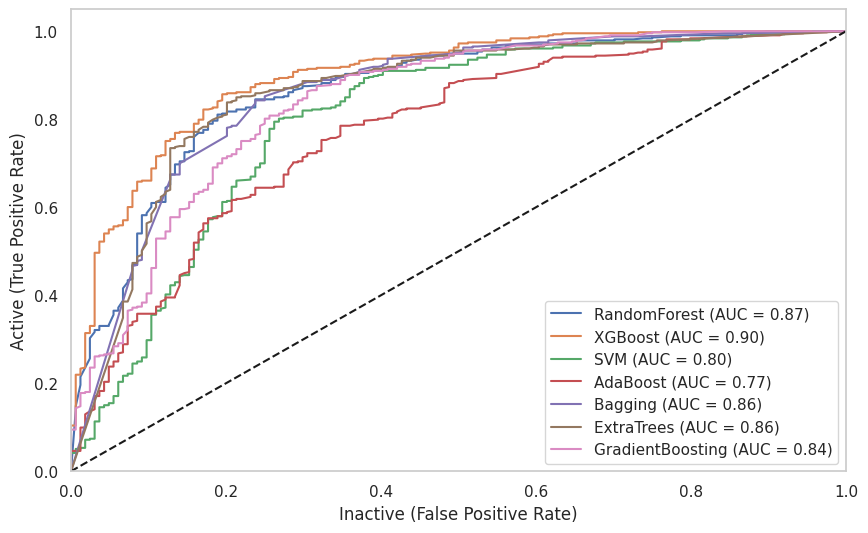

In [41]:
plt.figure(figsize=(10, 6))  
for name in classifiers.keys():  
    plt.plot(  
        results[name][f'{name}_fpr'],  
        results[name][f'{name}_tpr'],  
        label=f'{name} (AUC = {results[name]["roc_auc"]:.2f})',  
    )  

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for no discrimination  
plt.xlim([0.0, 1.0])  
plt.ylim([0.0, 1.05])  
plt.xlabel('Inactive (False Positive Rate)')  
plt.ylabel('Active (True Positive Rate)')  
# plt.title('Receiver Operating Characteristic (ROC) Curve')  
plt.legend(loc="lower right")  
plt.grid()  
plt.savefig('roc_curve.png', dpi =300)  # Save the figure for publication  
plt.show()  

## Compare the accuracy scores of different models using a horizontal bar chart

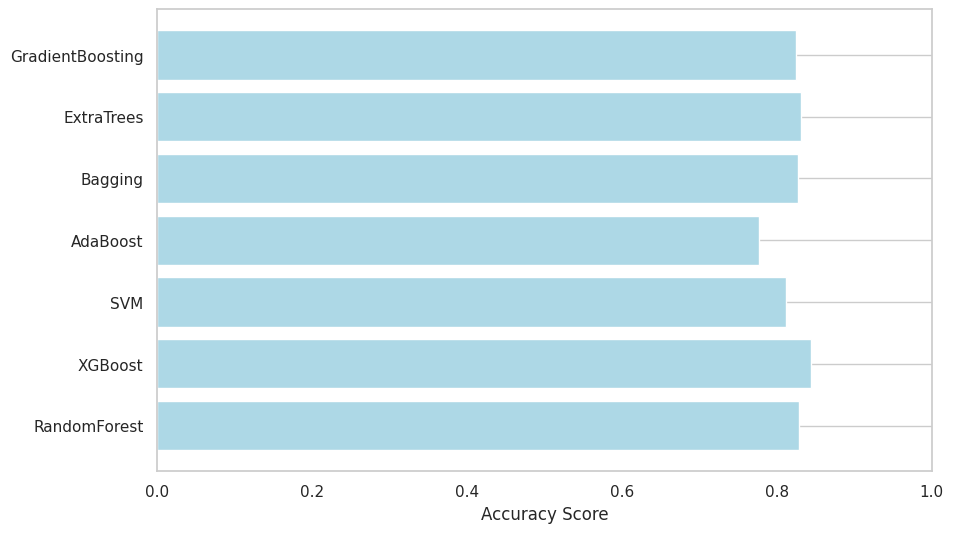

In [42]:
plt.figure(figsize=(10, 6))  
model_names = list(results.keys())  
accuracies = [results[name]['test_accuracy'] for name in model_names]  

plt.barh(model_names, accuracies, color='lightblue')  # You can choose a single color for bars or add more  
plt.xlabel('Accuracy Score')  
# plt.title('Accuracy Comparison of Different Models')  
plt.xlim(0, 1)  # Assuming accuracy ranges from 0 to 1  
plt.grid(axis='x')  
plt.savefig('accuracy_comparison.png', dpi = 300)  # Save the figure for publication  
plt.show()  